In [1]:
import pandas as pd
df = pd.read_json('datasets/recipe/train.json')

In [2]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [4]:
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [5]:
ingredients = {}
for lst in df['ingredients']:
    for i in lst:
        if not i in ingredients:
            ingredients[i] = 1
        else:
            ingredients[i] += 1

In [6]:
print('Number of Different Ingredients: %d'%len(ingredients))

Number of Different Ingredients: 6714


In [7]:
import operator
sorted_ingredients = sorted(ingredients.items(), key=operator.itemgetter(1))

In [8]:
sorted_ingredients

[('white almond bark', 1),
 ('Johnsonville Andouille Dinner Sausage', 1),
 ('lemon olive oil', 1),
 ('Taiwanese bok choy', 1),
 ('membrillo', 1),
 ('chestnut flour', 1),
 ('cinnamon graham crackers', 1),
 ('chorizo spanish', 1),
 ('instant butterscotch pudding mix', 1),
 ('Guinness Lager', 1),
 ('Franks Hot Sauce', 1),
 ('pecan pie', 1),
 ('whole grain thin spaghetti', 1),
 ('blueberri preserv', 1),
 ('wish bone guacamol ranch dress', 1),
 ('light brown muscavado sugar', 1),
 ('liquorice', 1),
 ('lamb neck fillets', 1),
 ('Old El Paso™ mild red enchilada sauce', 1),
 ('italian style rolls', 1),
 ('branzino fillets', 1),
 ('carbonated beverages', 1),
 ('Sargento® Traditional Cut Shredded Mozzarella Cheese', 1),
 ('yellowtail', 1),
 ('arame', 1),
 ('lemon cucumber', 1),
 ('aged gouda', 1),
 ('lemon soda', 1),
 ('annatto oil', 1),
 ('Crystal Farms Shredded Gouda Cheese', 1),
 ('light margarine', 1),
 ('canned chicken breast', 1),
 ('light tuna', 1),
 ('chinese hot mustard', 1),
 ('soy mar

In [9]:
min_freqs = [1,2,5,10,50,100,500,1000,5000,10000]
for i in range(len(min_freqs)):
    min_freq = min_freqs[i]
    filtered = {k: v for k, v in ingredients.items() if v >= min_freq}
    top_five = sorted(filtered.items(), key=operator.itemgetter(1))[:5]
    print('Number of ingredients with at least %d occurrences: %d/6714'%(min_freq, len(filtered)))
    for key in top_five:
        print ("%s: %s" % (key[0], key[1]))
    print()

Number of ingredients with at least 1 occurrences: 6714/6714
white almond bark: 1
Johnsonville Andouille Dinner Sausage: 1
lemon olive oil: 1
Taiwanese bok choy: 1
membrillo: 1

Number of ingredients with at least 2 occurrences: 4955/6714
jambalaya rice mix: 2
hibiscus: 2
myzithra: 2
mushroom powder: 2
kashmiri chile: 2

Number of ingredients with at least 5 occurrences: 3337/6714
grilled chicken breasts: 5
lemon curd: 5
sliced chicken: 5
burger buns: 5
demi-glace: 5

Number of ingredients with at least 10 occurrences: 2400/6714
sourdough: 10
instant white rice: 10
chocolate instant pudding: 10
green mango: 10
zinfandel: 10

Number of ingredients with at least 50 occurrences: 996/6714
bread slices: 50
great northern beans: 50
turbinado: 50
fruit: 50
thai green curry paste: 50

Number of ingredients with at least 100 occurrences: 648/6714
hazelnuts: 100
dried porcini mushrooms: 100
lemon grass: 100
beans: 100
masa harina: 100

Number of ingredients with at least 500 occurrences: 153/671

In [10]:
import numpy as np
import math
from matplotlib import pyplot as plt

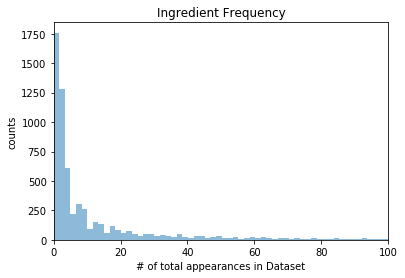

In [21]:
data = list(ingredients.values())

bins = np.linspace(0, 
                   500,
                   300) # fixed number of bins

#plt.xlim([min(data)-5, max(data)+5])
plt.xlim([0,100])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('')
plt.xlabel('# of total appearances in Dataset')
plt.ylabel('counts')

plt.show()